In [4]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#cargamos los datos de entrada
df = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_serie_fin.csv",index_col=0,sep=",")
#veamos cuantas dimensiones y registros contiene



## Descripción básica del dataset

In [5]:
df.head(5)

,date,hors,ws,wd,horsObs,wp1
3753,20090809,10,1.78,30.74,0,0.055
3754,20090809,11,2.37,34.08,0,0.030
3755,20090809,12,3.05,40.15,0,0.060
3756,20090809,13,3.76,50.33,0,0.130
3757,20090809,14,4.56,59.86,0,0.155


## Desplazando en 5 dias

In [8]:
desplazado = df['wp1'].shift(1)
desplazado[:5]

3753      NaN
3754    0.055
3755    0.030
3756    0.060
3757    0.130
Name: wp1, dtype: float64

In [10]:
# calculando el porcentaje de variación del día.
variacion_diaria = df['wp1'] / df['wp1'].shift(1) - 1
df['var_diaria'] = variacion_diaria
df['var_diaria'][:5]

3753         NaN
3754   -0.454545
3755    1.000000
3756    1.166667
3757    0.192308
Name: var_diaria, dtype: float64

In [12]:
# mismo resultado utilizando pct_change()
df['wp1'].pct_change()[:5]

3753         NaN
3754   -0.454545
3755    1.000000
3756    1.166667
3757    0.192308
Name: wp1, dtype: float64

In [14]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + df['wp1'].pct_change()).cumprod()
df['rend_diario'] = rendimiento_diario
df['rend_diario'][:5]

3753         NaN
3754    0.545455
3755    1.090909
3756    2.363636
3757    2.818182
Name: rend_diario, dtype: float64

In [15]:
df.head()

,date,hors,ws,wd,horsObs,wp1,var_diaria,rend_diario
3753,20090809,10,1.78,30.74,0,0.055,NaN,NaN
3754,20090809,11,2.37,34.08,0,0.030,-0.454545,0.545455
3755,20090809,12,3.05,40.15,0,0.060,1.000000,1.090909
3756,20090809,13,3.76,50.33,0,0.130,1.166667,2.363636
3757,20090809,14,4.56,59.86,0,0.155,0.192308,2.818182


## Visualizando series de tiempo

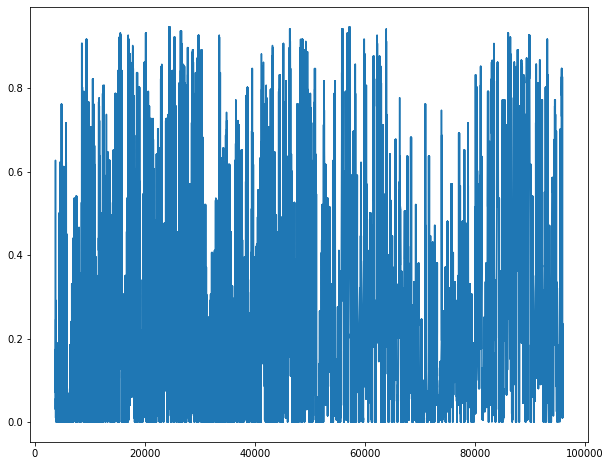

In [17]:
# graficando wp1
plot = df['wp1'].plot(figsize=(10, 8))

In [19]:

# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
df_ciclo, df_tend = sm.tsa.filters.hpfilter(df['wp1'])
df['tend'] = df_tend

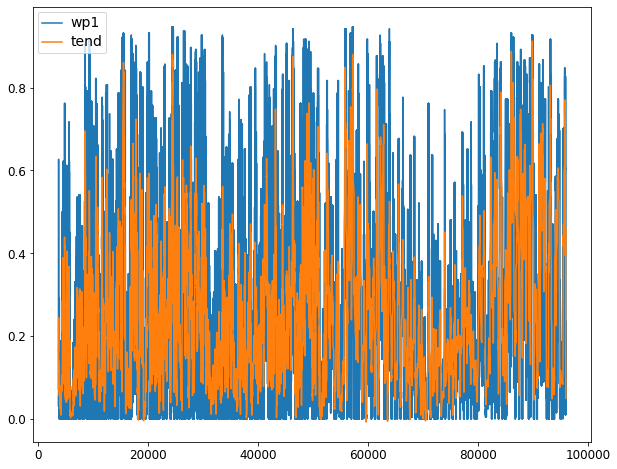

In [20]:
# graficando la variacion del precio real con la tendencia.
df[['wp1', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

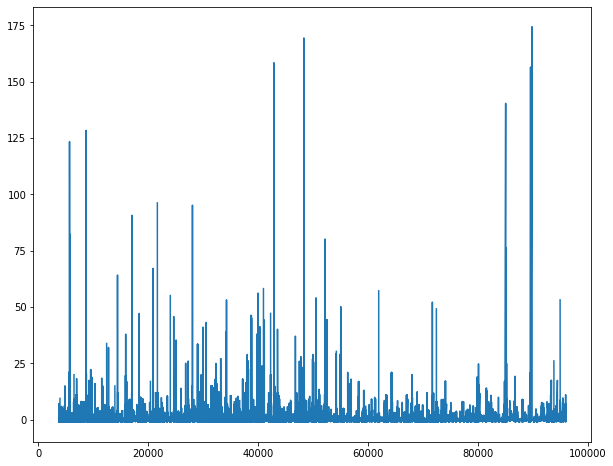

In [21]:
# graficando rendimiento diario
plot = df['var_diaria'].plot(figsize=(10, 8))

In [22]:
df.head()

,date,hors,ws,wd,horsObs,wp1,var_diaria,rend_diario,tend
3753,20090809,10,1.78,30.74,0,0.055,NaN,NaN,0.162747
3754,20090809,11,2.37,34.08,0,0.030,-0.454545,0.545455,0.174210
3755,20090809,12,3.05,40.15,0,0.060,1.000000,1.090909,0.185606
3756,20090809,13,3.76,50.33,0,0.130,1.166667,2.363636,0.196777
3757,20090809,14,4.56,59.86,0,0.155,0.192308,2.818182,0.207487


## Pronostico con ARIMA

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                    wp1   No. Observations:                  104
Model:                     ARMA(1, 0)   Log Likelihood                 113.884
Method:                       css-mle   S.D. of innovations              0.081
Date:                Sun, 16 Feb 2020   AIC                           -221.768
Time:                        00:26:09   BIC                           -213.834
Sample:                             0   HQIC                          -218.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1373      0.024      5.725      0.000       0.090       0.184
ar.L1.wp1      0.6759      0.072      9.362      0.000       0.534       0.817
                                    Roots           

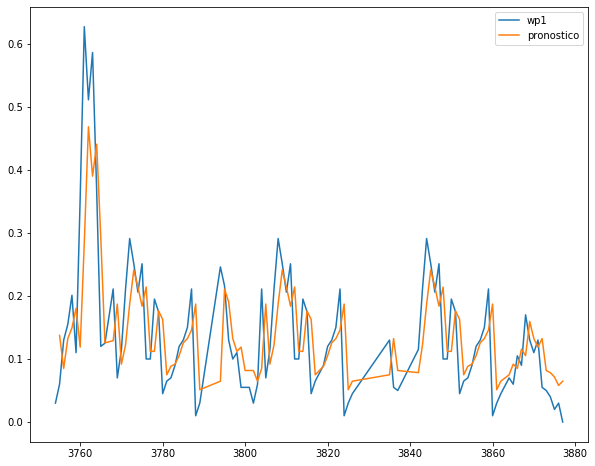

In [37]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(df['wp1'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df['pronostico'] = resultados.fittedvalues  
plot = df[['wp1', 'pronostico']].plot(figsize=(10, 8))  
print(resultados.summary())

In [38]:
df.head()

,date,hors,ws,wd,horsObs,wp1,var_diaria,rend_diario,tend,pronostico
3754,20090809,11,2.37,34.08,0,0.030,-0.454545,0.545455,0.174210,NaN
3755,20090809,12,3.05,40.15,0,0.060,1.000000,1.090909,0.185606,0.137320
3756,20090809,13,3.76,50.33,0,0.130,1.166667,2.363636,0.196777,0.085058
3757,20090809,14,4.56,59.86,0,0.155,0.192308,2.818182,0.207487,0.132372
3758,20090809,15,5.41,65.66,0,0.201,0.296774,3.654545,0.217459,0.149270


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 3754 to 3877
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         105 non-null    int64  
 1   hors         105 non-null    int64  
 2   ws           105 non-null    float64
 3   wd           105 non-null    float64
 4   horsObs      105 non-null    int64  
 5   wp1          105 non-null    float64
 6   var_diaria   105 non-null    float64
 7   rend_diario  105 non-null    float64
 8   tend         105 non-null    float64
 9   pronostico   104 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 9.0 KB


In [40]:
np.isnan(df).any()

date           False
hors           False
ws             False
wd             False
horsObs        False
wp1            False
var_diaria     False
rend_diario    False
tend           False
pronostico      True
dtype: bool

In [41]:
df = df.dropna() 
df

,date,hors,ws,wd,horsObs,wp1,var_diaria,rend_diario,tend,pronostico
3755,20090809,12,3.05,40.15,0,0.060,1.000000,1.090909,0.185606,0.137320
3756,20090809,13,3.76,50.33,0,0.130,1.166667,2.363636,0.196777,0.085058
3757,20090809,14,4.56,59.86,0,0.155,0.192308,2.818182,0.207487,0.132372
3758,20090809,15,5.41,65.66,0,0.201,0.296774,3.654545,0.217459,0.149270
3759,20090809,16,6.12,67.43,0,0.110,-0.452736,2.000000,0.226382,0.180363
...,...,...,...,...,...,...,...,...,...,...
3873,20090810,34,2.22,116.17,0,0.050,-0.090909,0.909091,0.068993,0.081678
3874,20090810,35,2.64,109.40,0,0.040,-0.200000,0.727273,0.068325,0.078298
3875,20090810,36,3.10,109.71,0,0.020,-0.500000,0.363636,0.068309,0.071539
3876,20090810,37,3.51,117.56,0,0.030,0.500000,0.545455,0.069036,0.058021


In [42]:
np.isnan(df).any()

date           False
hors           False
ws             False
wd             False
horsObs        False
wp1            False
var_diaria     False
rend_diario    False
tend           False
pronostico     False
dtype: bool

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                              ARMA Model Results                              
Dep. Variable:             var_diaria   No. Observations:                  103
Model:                     ARMA(1, 0)   Log Likelihood                -143.410
Method:                       css-mle   S.D. of innovations              0.974
Date:                Sun, 16 Feb 2020   AIC                            292.821
Time:                        00:28:15   BIC                            300.725
Sample:                             0   HQIC                           296.022
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2585      0.099      2.615      0.009       0.065       0.452
ar.L1.var_diaria     0.0297      0.099      0.300      0.765      -0.165       0.224
                            

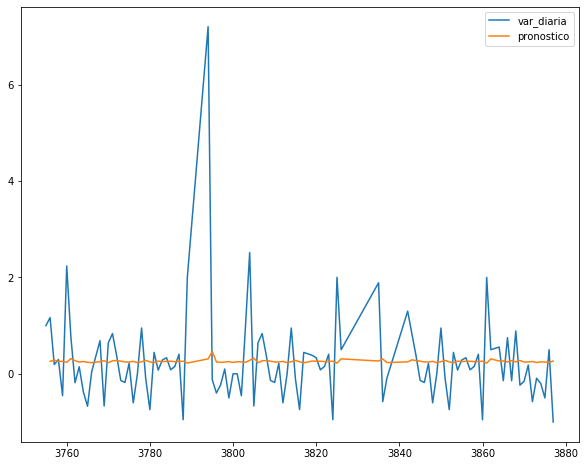

In [44]:

# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(df['var_diaria'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df['pronostico'] = resultados.fittedvalues  
print(resultados.summary())
plot = df[['var_diaria', 'pronostico']].plot(figsize=(10, 8)) 